In [18]:
import pandas as pd

import matplotlib.ticker as tick
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
#from util.reformat_large_tick_values import reformat_large_tick_values as ticker
import plotly.graph_objects as go

from sqlalchemy.engine import create_engine
import warnings
warnings.filterwarnings('ignore', message='Cannot create BigQuery Storage client*')

In [19]:
engine = create_engine('bigquery://', credentials_path= '../key/iowa-liquor-sales-365322-12ff7a5498e6.json')

In [20]:
counties = ['Polk', 'Linn', 'Scott', 'Johnson', 'Black Hawk', 'Woodbury', 'Dubuque', 'Story', 'Dallas', 'Pottawattamie']
colors = ['#edc948', '#59a14f', '#ff9da7', '#76b7b2', '#4e79a7', '#b07aa1', '#bab0ac', '#9c755f', '#e15759', '#f28e2b']
county_colors = {county: color for county, color in zip(counties, colors)}

# Data imports

Liquor Sales Data: Iowa Liquor Sales dataset, Iowa Department of Commerce, Alcoholic Beverages Division
 `bigquery-public-data.iowa_liquor_sales`  
Data represents sales to Iowa Class "E" liquor licensees. Examples include grocery stores, liquor stores etc which sell liquor for off-premises consumption. Full dataset stored in BigQuery. Data accessed via SQL queries.

Population Data: United States Census Bureau, https://www.census.gov/quickfacts/fact/table/IA/POP010220 
Accurate population numbers are limited to 2020, the year of the US census. In this analysis, population counts and percent minors for 2020 are used for all years (2018-2023). Adult population was extrapolated using the "Persons under 18 years, percent" census data column as no counts are available for 21 years and older.

Data imports from source and dataframe creation available in [Iowa Liquor Exploratory Analysis](iowa_liquor_exploratory_analysis.ipynb)

In [21]:
liters_sold_per_adult_df = pd.read_csv('../data/liters_sold_per_adult.csv')

In [22]:
liters_county_month_df = pd.read_csv('../data/liters_county_month.csv')
liters_county_month_df['month_year'] = pd.to_datetime(liters_county_month_df['month_year'])
#liters_county_month_df.info()

In [23]:
pivot_table_df = pd.read_csv('../data/pivot_table_month.csv')
month_df_long = pd.read_csv('../data/month_df_long.csv')
liters_county_month_df.head()

,liters_sold_county,month,year,county,month_year
0,90066.28,1,2018,Black Hawk,2018-01-01
1,55381.34,1,2018,Woodbury,2018-01-01
2,96773.09,1,2018,Scott,2018-01-01
3,48652.90,1,2018,Pottawattamie,2018-01-01
4,298855.15,1,2018,Polk,2018-01-01


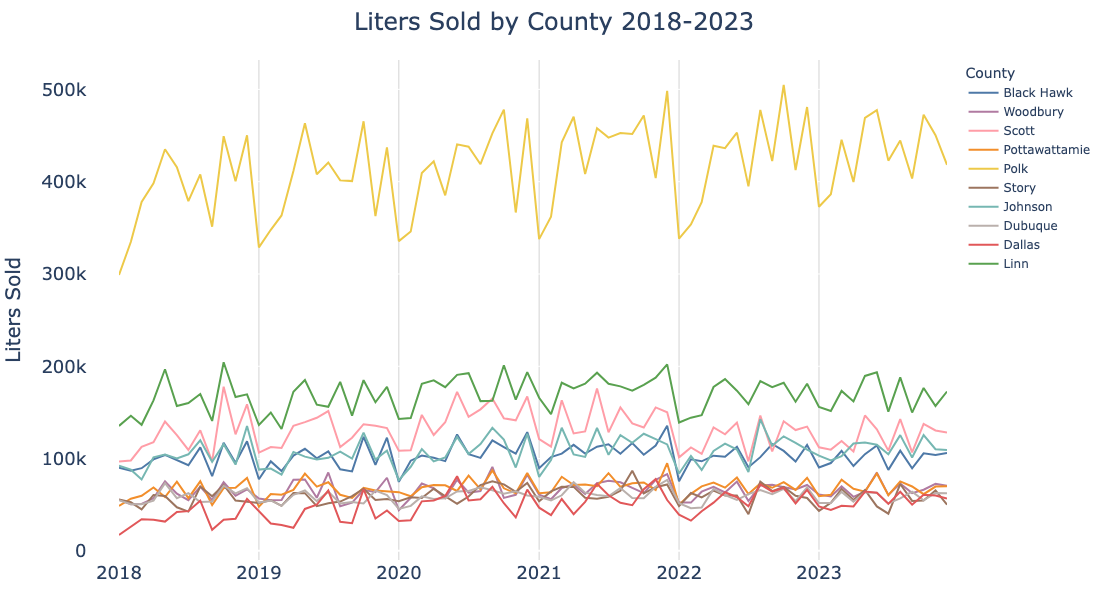

In [24]:
liters_county_month_df.sort_values(by=['month_year'], inplace=True)
fig = px.line(
    liters_county_month_df,
    x='month_year',
    y='liters_sold_county',
    orientation='h',  # Horizontal bar chart
    color='county',  # Assign colors based on 'county' field
    color_discrete_map=county_colors,  # Apply custom colors
    labels={'liters_sold': 'Liters Sold ', 'county': 'County ', 'month_year': 'Month Year ', 'liters_sold_county': 'Liters Sold '},  # Custom labels
    height=600  # Adjust height to accommodate all counties
)

# Update layout
fig.update_layout(
    xaxis=dict(
        title=None,
        tickfont=dict(size=18),
        title_font = dict(size = 20),
        showgrid = True,
        gridcolor = 'LightGrey'
    ), 
    
    yaxis=dict(
        title= 'Liters Sold',
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        ticksuffix = '     ', #used this to create pad between y tick labels and chart
        tickformat=".0s" # No decimal places, use SI notation
    ),
    
    title=dict(
        text = "Liters Sold by County 2018-2023",
        font = dict(size = 30),
        x = .5,
        xanchor = 'center'
    ),

    showlegend=True, 
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot area
    margin=dict(l=40, r=40, t=60, b=40),  # Left, Right, Top, Bottom margins
    title_font_size = 24
)

fig.show()

In [25]:
month_df_long['month_year'] = pd.to_datetime(month_df_long['month_year'])
month_df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month_year   720 non-null    datetime64[ns]
 1   county       720 non-null    object        
 2   liters_sold  720 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.0+ KB


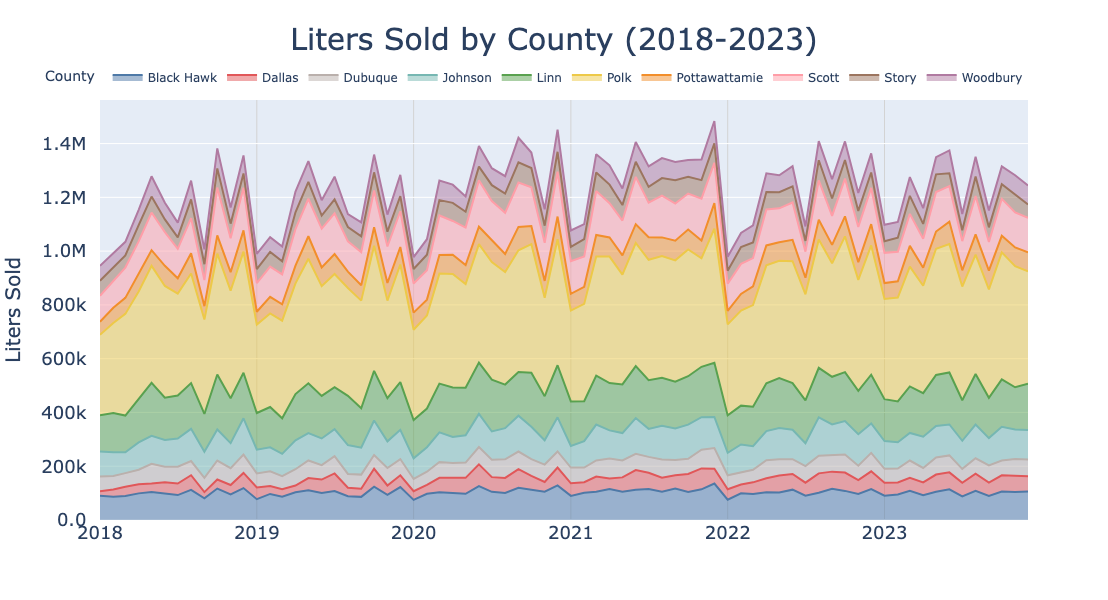

In [26]:
fig = px.area(
    month_df_long,
    x='month_year', 
    y='liters_sold',
    color='county',
    color_discrete_map=county_colors,  # Custom colors
    title='Liters Sold by County',
    labels={'index': 'Month Year', 'county': 'County ', 'month_year': 'Month Year ', 'liters_sold':'Liters Sold '},
    width = 1100, 
    height = 600
)

fig.update_layout(
    
    xaxis=dict(
        title=None,
        tickfont=dict(size=18),
        showgrid = True,
        gridcolor = 'LightGrey'
    ), 
    
    yaxis=dict(
        title="Liters Sold",
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        ticksuffix = '  ',
        tickformat=".2s" # No decimal places, use SI notation
    ),

    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    
        title=dict(
        text = "Liters Sold by County (2018-2023)",  
        font = dict(size = 30),
        x = .5,
        xanchor = 'center'),   
)
fig.show()

We see some seasonal patterns, including spikes in spring, October, and December. The most notable pattern seen across all counties is a jump in sales just before the new year and a drop in January. This may be due to the fact that we are looking at wholesale data. Stores likely stock up for December and new year celebrations and pause ordering afterward. 

In [27]:
month_df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month_year   720 non-null    datetime64[ns]
 1   county       720 non-null    object        
 2   liters_sold  720 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.0+ KB


Let's look at the last year of sales in the top 5 counties

In [28]:
mask = (month_df_long['month_year'] >= '2023-01-01') & (month_df_long['county'].isin(['Polk', 'Linn', 'Scott', 'Johnson', 'Black Hawk']))
two_year_month_df_long = month_df_long[mask]
two_year_month_df_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 60 to 575
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month_year   60 non-null     datetime64[ns]
 1   county       60 non-null     object        
 2   liters_sold  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.9+ KB


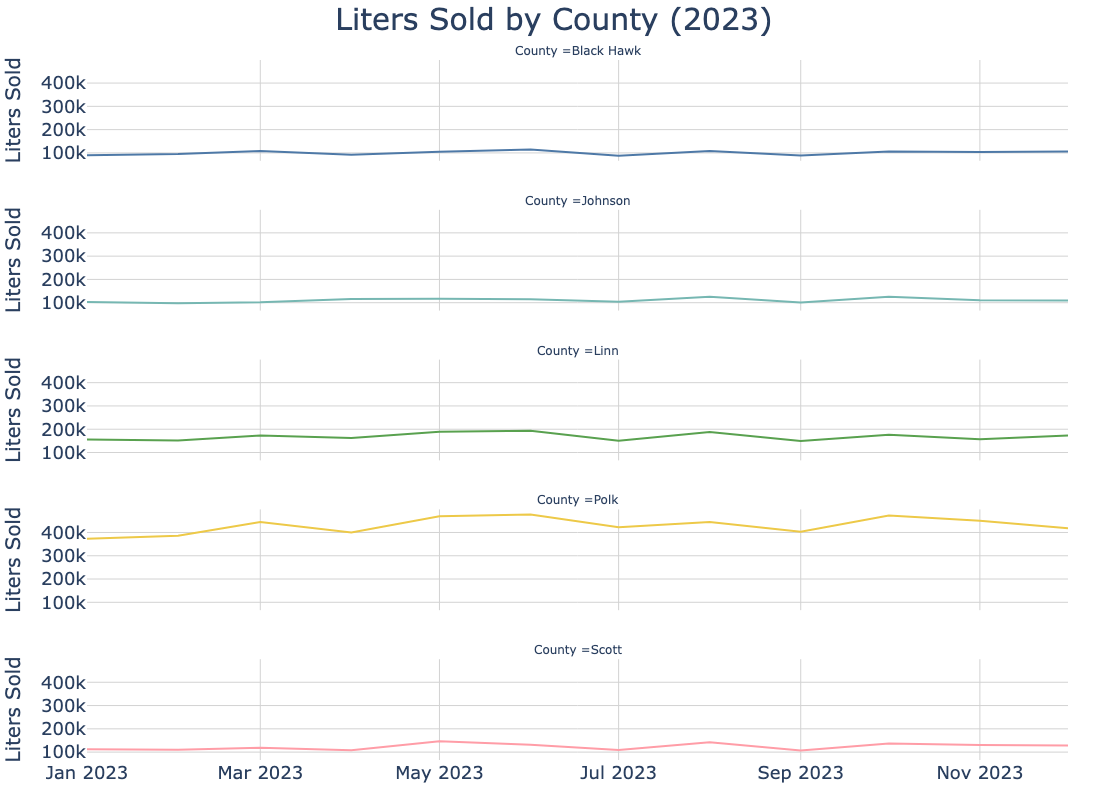

In [29]:
fig = px.line(
    two_year_month_df_long, 
    x='month_year', 
    y='liters_sold', 
    facet_col='county',  # Creates a separate plot for each county
    facet_col_wrap=1,  # Each subplot in a new row
    color='county',
    color_discrete_map=county_colors,  # Custom colors
    title='Liters Sold by County',
    labels={'index': 'Month Year', 'county': 'County ', 'month_year': 'Month Year ', 'liters_sold':'Liters Sold '}

)
# Update x-axes for all subplots 
fig.update_xaxes(
    title=None,
    tickfont=dict(size=18),
    showgrid=True,
    gridcolor='LightGrey'
),

# Update y-axes for all subplots
fig.update_yaxes(
    title='Liters Sold',
    tickfont=dict(size=18),
    tickformat=".0s", # No decimal places, use SI notation
    title_font=dict(size=20),
    showgrid=True,
    gridcolor='LightGrey',
    matches='y'
),

fig.update_layout(
    title=dict(
        text='Liters Sold by County (2023)',
        x=0.5,  # Center the title
        xanchor='center',
        font=dict(size=30) 
    ),
    
    plot_bgcolor='rgba(0,0,0,0)',  
    margin=dict(l=40, r=40, t=60, b=40), 
    width=1100,
    height=800, 
    showlegend = False
)

fig.show()

In [30]:
cat_sql_statement = """
with source_table AS(
  SELECT
  volume_sold_liters,
  county,
  item_description,
  category_name
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE EXTRACT(YEAR FROM date) = 2023 AND county IN ("POLK")
  #,"LINN","SCOTT","JOHNSON","BLACK HAWK","WOODBURY","DUBUQUE","STORY","DALLAS","POTTAWATTAMIE")
),

liquor_categories AS 
  (SELECT
  volume_sold_liters,
  county,
  CASE 
  WHEN category_name LIKE '%AMAR%' OR category_name LIKE '%CREME%'OR category_name LIKE '%LIQUEUR%' OR category_name LIKE '%CORDIAL%' OR category_name LIKE '%ANIS%' OR category_name LIKE '%TRIPLE SEC%' OR item_description LIKE '%JAGERM%' OR item_description LIKE '%LIQUEUR%' OR item_description LIKE '%SAINTS N SINNERS APPLE PIE%' THEN 'Liqueur' 
  WHEN category_name LIKE '%WHIS%' OR category_name LIKE '%BOUR%'OR category_name LIKE '%RYE%' OR item_description LIKE '%RYE%' OR item_description LIKE '%WHIS%'OR item_description LIKE '%SCOTCH%' OR category_name LIKE '%SCOTCH%' OR item_description LIKE '%BEAM%' OR item_description LIKE '%BOUR%' OR item_description LIKE '%CROWN ROYAL%' OR item_description LIKE '%JACK DAN%'OR item_description LIKE '%EVAN WILL%'OR item_description LIKE '%MAKER%MARK%' OR item_description LIKE '%SIR WINSTON%' OR item_description LIKE '%ELIJAH%' OR item_description LIKE '%JOHNNIE WALKER%'THEN 'Whiskey'
  WHEN category_name LIKE '%VOD%' OR item_description LIKE '%VOD%'OR item_description LIKE '%SMIRN%'THEN 'Vodka'
  WHEN category_name LIKE '%BRANDI%' OR category_name LIKE '%BRANDY%' OR category_name LIKE '%SCHNAPPS%' OR item_description LIKE '%COGNAC%' OR item_description LIKE '%HENNESSY%'THEN 'Brandy'
  WHEN category_name LIKE '%RUM%' OR item_description LIKE '%RUM%' OR item_description LIKE '%CAPTAIN MOR%'THEN 'Rum'
  WHEN category_name LIKE '%TEQ%' OR category_name LIKE '%MEZC%' OR item_description LIKE '%JUAREZ%' OR item_description LIKE '%TEQU%' OR item_description LIKE '%REPOSADO%' OR item_description LIKE '%TORTILLA GOLD%' OR item_description LIKE '%MONTEZUMA%' THEN 'Tequila and Mezcal'
  WHEN category_name LIKE '%GIN%' OR item_description LIKE '%GIN%' THEN 'Gin'

  WHEN category_name LIKE '%COCKT%' OR item_description LIKE '%TARANTULA%' THEN 'Cocktails'
  ELSE 'Other' END AS liquor_type
  FROM source_table)

SELECT  
  liquor_type,
  county,
  sum(volume_sold_liters) AS liters_sold_per_cat
FROM liquor_categories
WHERE county = "POLK"
GROUP BY liquor_type, county
ORDER BY liters_sold_per_cat DESC
""" .strip()

In [31]:
cat_sales_df = pd.read_sql_query(cat_sql_statement, engine)
cat_sales_df['county'] = cat_sales_df['county'].str.title()
cat_sales_df.head()

,liquor_type,county,liters_sold_per_cat
0,Vodka,Polk,1732265.68
1,Whiskey,Polk,1224648.26
2,Liqueur,Polk,572729.41
3,Tequila and Mezcal,Polk,513073.10
4,Rum,Polk,483269.61


In [32]:
liquor_order = ['Vodka', 'Whiskey', 'Rum', 'Tequila and Mezcal', 'Brandy', 'Cocktails', 'Gin', 'Liqueur', 'Other' ]
liquor_colors = {
    'Vodka': '#599ad3',         # Softer blue
    'Whiskey': '#f1a340',       # Softer orange
    'Rum': '#86c166',           # Soft green
    'Tequila and Mezcal': '#e15759',  # Soft red
    'Brandy': '#b07aa1',        # Soft purple
    'Cocktails': '#be8663',     # Soft brown
    'Gin': '#f7b6d2',           # Soft pink
    'Liqueur': '#afafaf',       # Soft gray
    'Other': '#decf3f'          # Soft yellow
}

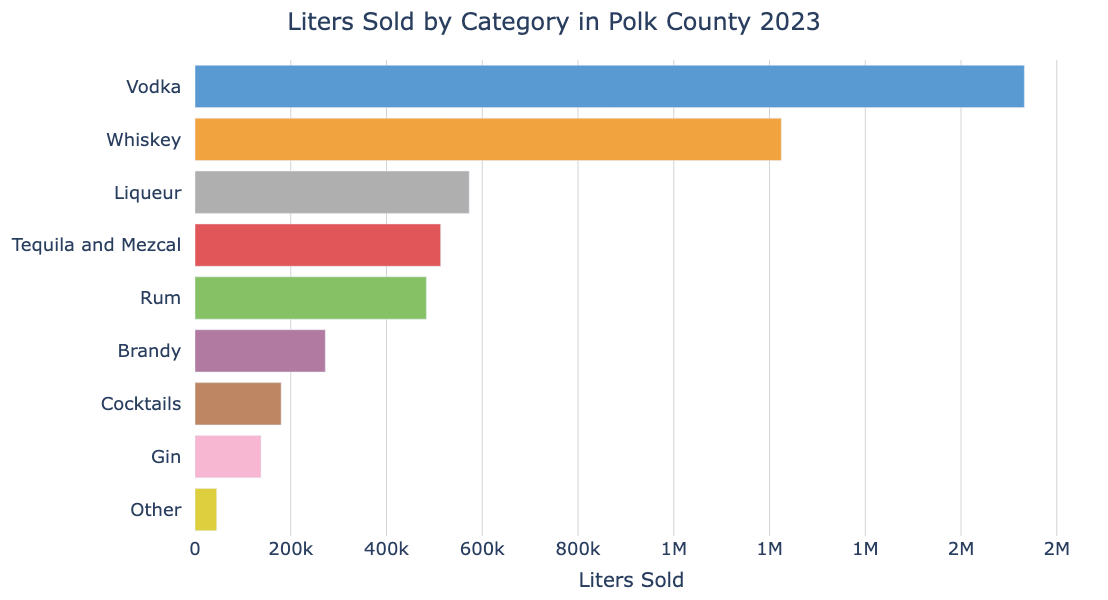

In [33]:
fig = px.bar(
    cat_sales_df,
    x='liters_sold_per_cat',
    y='liquor_type',
    orientation='h', 
    color='liquor_type',  
    color_discrete_map= liquor_colors,  # Apply custom colors
    labels={'liquor_type': 'Liquor Type ', 'liters_sold_per_cat': 'Liters Sold '}, 
    height=600  
)

# Update layout
fig.update_layout(
    xaxis=dict(
        title='Liters Sold',
        tickfont=dict(size=18),
        title_font = dict(size = 20),
        showgrid = True,
        gridcolor = 'LightGrey',
        tickformat=".0s" # No decimal places, use SI notation

    ), 
    yaxis=dict(
        title=None,
        tickfont=dict(size=18),
        ticksuffix = '  ' #pad between y tick labels and chart
    ),
    
    title=dict(
        text = "Liters Sold by Category in Polk County 2023",
        x = .5,
        xanchor = 'center'
     ),

    showlegend=False, 
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot area
    margin=dict(l=40, r=40, t=60, b=40),  # Left, Right, Top, Bottom margins
    title_font_size = 24
)

fig.show()

In [34]:
cat_sql_statement = """
with source_table AS(
  SELECT
  volume_sold_liters,
  county,
  item_description,
  category_name
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE EXTRACT(YEAR FROM date) = 2023 AND county IN ("POLK","LINN","SCOTT","JOHNSON","BLACK HAWK","WOODBURY","DUBUQUE","STORY","DALLAS","POTTAWATTAMIE")
),

liquor_categories AS 
  (SELECT
  volume_sold_liters,
  county,
  CASE 
  WHEN category_name LIKE '%AMAR%' OR category_name LIKE '%CREME%'OR category_name LIKE '%LIQUEUR%' OR category_name LIKE '%CORDIAL%' OR category_name LIKE '%ANIS%' OR category_name LIKE '%TRIPLE SEC%' OR item_description LIKE '%JAGERM%' OR item_description LIKE '%LIQUEUR%' OR item_description LIKE '%SAINTS N SINNERS APPLE PIE%' THEN 'Liqueur' 
  WHEN category_name LIKE '%WHIS%' OR category_name LIKE '%BOUR%'OR category_name LIKE '%RYE%' OR item_description LIKE '%RYE%' OR item_description LIKE '%WHIS%'OR item_description LIKE '%SCOTCH%' OR category_name LIKE '%SCOTCH%' OR item_description LIKE '%BEAM%' OR item_description LIKE '%BOUR%' OR item_description LIKE '%CROWN ROYAL%' OR item_description LIKE '%JACK DAN%'OR item_description LIKE '%EVAN WILL%'OR item_description LIKE '%MAKER%MARK%' OR item_description LIKE '%SIR WINSTON%' OR item_description LIKE '%ELIJAH%' OR item_description LIKE '%JOHNNIE WALKER%'THEN 'Whiskey'
  WHEN category_name LIKE '%VOD%' OR item_description LIKE '%VOD%'OR item_description LIKE '%SMIRN%'THEN 'Vodka'
  WHEN category_name LIKE '%BRANDI%' OR category_name LIKE '%BRANDY%' OR category_name LIKE '%SCHNAPPS%' OR item_description LIKE '%COGNAC%' OR item_description LIKE '%HENNESSY%'THEN 'Brandy'
  WHEN category_name LIKE '%RUM%' OR item_description LIKE '%RUM%' OR item_description LIKE '%CAPTAIN MOR%'THEN 'Rum'
  WHEN category_name LIKE '%TEQ%' OR category_name LIKE '%MEZC%' OR item_description LIKE '%JUAREZ%' OR item_description LIKE '%TEQU%' OR item_description LIKE '%REPOSADO%' OR item_description LIKE '%TORTILLA GOLD%' OR item_description LIKE '%MONTEZUMA%' THEN 'Tequila and Mezcal'
  WHEN category_name LIKE '%GIN%' OR item_description LIKE '%GIN%' THEN 'Gin'
  WHEN category_name LIKE '%COCKT%' OR item_description LIKE '%TARANTULA%' THEN 'Cocktails'
  ELSE 'Other' END AS liquor_type
  FROM source_table)

SELECT  
  liquor_type,
  county,
  sum(volume_sold_liters) AS liters_sold_per_cat
FROM liquor_categories
GROUP BY liquor_type, county
ORDER BY liters_sold_per_cat
""" .strip()

In [35]:
cat_sales_df = pd.read_sql_query(cat_sql_statement, engine)
cat_sales_df['county'] = cat_sales_df['county'].str.title()

cat_sales_df.head()

,liquor_type,county,liters_sold_per_cat
0,Other,Dubuque,4783.97
1,Other,Woodbury,5509.64
2,Other,Story,7134.72
3,Other,Pottawattamie,8619.58
4,Other,Dallas,8674.80


In [36]:
# Create a pivot table
cat_pivot_table_df = cat_sales_df.pivot_table(
    index='liquor_type',  # Data to be grouped by
    columns='county',   # Creating separate columns for each county
    values='liters_sold_per_cat', # Values to aggregate
    aggfunc='sum'       # Aggregation function
)
cat_pivot_table_df

county,Black Hawk,Dallas,Dubuque,Johnson,Linn,Polk,Pottawattamie,Scott,Story,Woodbury
liquor_type,,,,,,,,,,
Brandy,96985.48,9729.05,42470.02,64438.70,108570.71,272123.65,40455.64,93110.44,23929.66,45373.54
Cocktails,40797.14,43197.62,26055.35,55817.86,67729.47,179965.59,26173.00,68374.19,28147.45,32348.18
Gin,28910.86,20685.72,13254.36,54528.20,48291.31,137903.58,15764.30,32625.79,18005.83,14788.76
Liqueur,118363.61,56726.87,55839.56,124007.33,237700.25,572729.41,102986.90,153599.16,57873.94,87930.30
Other,10932.61,8674.80,4783.97,16616.99,20324.12,45233.47,8619.58,12777.37,7134.72,5509.64
Rum,126213.89,62534.65,89315.53,123536.77,210313.42,483269.61,90533.73,140434.96,88224.07,97308.16
Tequila and Mezcal,116132.87,33346.64,40012.51,92519.86,175150.57,513073.10,69257.29,124011.73,36015.13,68774.77
Vodka,367786.30,233679.88,236635.64,479212.33,654292.76,1732265.68,247308.18,510273.89,227102.09,230224.16
Whiskey,300090.07,190245.47,191200.40,315783.69,497910.06,1224648.26,216962.75,345685.31,181967.69,220290.03


In [37]:
cat_df_long = cat_pivot_table_df.reset_index().melt(id_vars='liquor_type', var_name='county', value_name='liters_sold_per_cat')
cat_df_long.head()
cat_df_long.sort_values(by = 'liters_sold_per_cat', ascending = False)

,liquor_type,county,liters_sold_per_cat
52,Vodka,Polk,1732265.68
53,Whiskey,Polk,1224648.26
43,Vodka,Linn,654292.76
48,Liqueur,Polk,572729.41
51,Tequila and Mezcal,Polk,513073.10
...,...,...,...
13,Other,Dallas,8674.80
58,Other,Pottawattamie,8619.58
76,Other,Story,7134.72
85,Other,Woodbury,5509.64


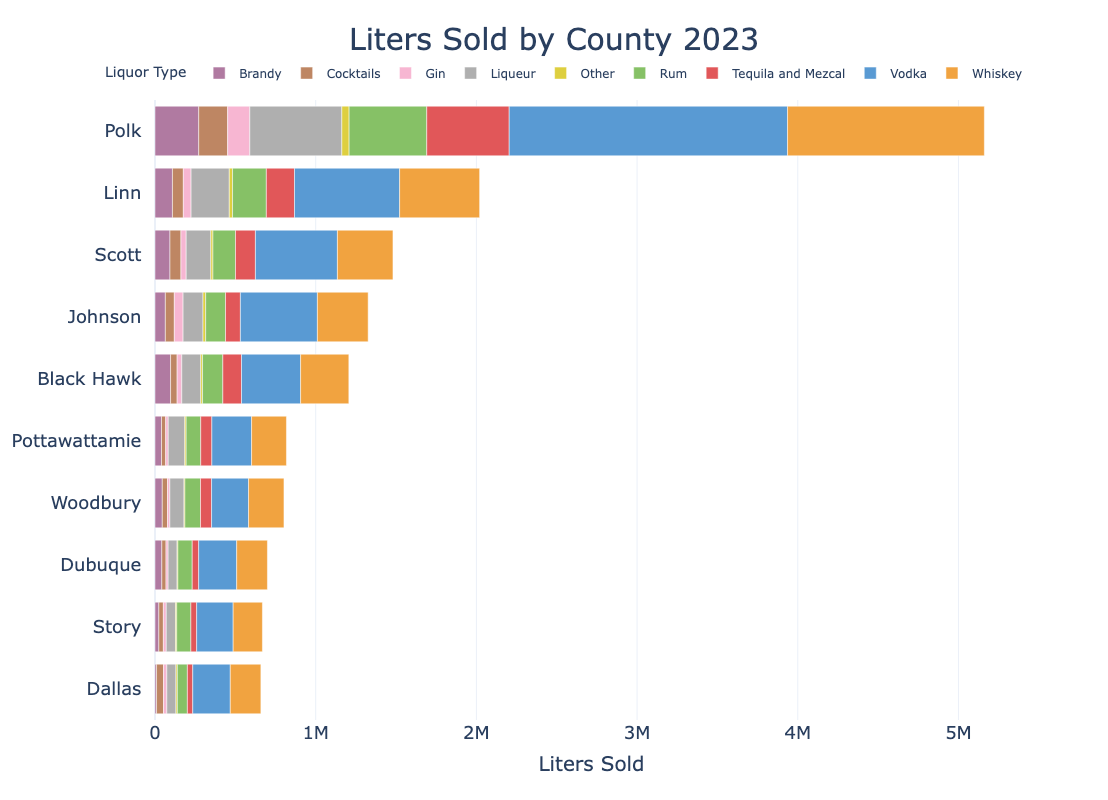

In [38]:
county_order = ['Polk', 'Linn', 'Scott', 'Johnson', 'Black Hawk', 'Pottawattamie', 'Woodbury', 'Dubuque', 'Story', 'Dallas']
fig = px.bar(
    cat_df_long,
    x='liters_sold_per_cat',  
    y='county',
    color='liquor_type',  # stack by 
    title='Liters Sold by County per Year',
    labels={'county': 'County ','liquor_type': 'Liquor Type ', 'liters_sold_per_cat': 'Liters Sold per Category '}, 
    template='plotly_white',
    color_discrete_map = liquor_colors,
    category_orders = {'county': county_order}
)

fig.update_layout(
    xaxis = dict(
        title = 'Liters Sold',
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        tickformat = '.0s'
    ),
    
    yaxis = dict(
        title= None,
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        ticksuffix = '  '
    ),

     legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
    ),
        title=dict(
        text = "Liters Sold by County 2023",
        font = dict(size = 30),
        x = .5,
        xanchor = 'center'),
    width = 1100,
    height = 800,
)

fig.show()

In [39]:
cat_year_sql_statement = """
with source_table AS(
    SELECT
      EXTRACT(YEAR FROM date) AS year,
      EXTRACT(MONTH FROM date) AS month,
      volume_sold_liters,
      county,
      item_description,
      category_name
    FROM `bigquery-public-data.iowa_liquor_sales.sales`
    WHERE EXTRACT(YEAR FROM date) IN (2018,2019,2020,2021,2022,2023) AND county IN ("POLK","LINN","SCOTT","JOHNSON","BLACK HAWK","WOODBURY","DUBUQUE","STORY","DALLAS","POTTAWATTAMIE")
),

liquor_categories AS 
  (SELECT
      year,
      month,
      volume_sold_liters,
      CASE 
          WHEN category_name LIKE '%AMAR%' OR category_name LIKE '%CREME%'OR category_name LIKE '%LIQUEUR%' OR category_name LIKE '%CORDIAL%' OR category_name LIKE '%ANIS%' OR category_name LIKE '%TRIPLE SEC%' OR item_description LIKE '%JAGERM%' OR item_description LIKE '%LIQUEUR%' OR item_description LIKE '%SAINTS N SINNERS APPLE PIE%' THEN 'Liqueur' 
          WHEN category_name LIKE '%WHIS%' OR category_name LIKE '%BOUR%'OR category_name LIKE '%RYE%' OR item_description LIKE '%RYE%' OR item_description LIKE '%WHIS%'OR item_description LIKE '%SCOTCH%' OR category_name LIKE '%SCOTCH%' OR item_description LIKE '%BEAM%' OR item_description LIKE '%BOUR%' OR item_description LIKE '%CROWN ROYAL%' OR item_description LIKE '%JACK DAN%'OR item_description LIKE '%EVAN WILL%'OR item_description LIKE '%MAKER%MARK%' OR item_description LIKE '%SIR WINSTON%' OR item_description LIKE '%ELIJAH%' OR item_description LIKE '%JOHNNIE WALKER%'THEN 'Whiskey'
          WHEN category_name LIKE '%VOD%' OR item_description LIKE '%VOD%'OR item_description LIKE '%SMIRN%'THEN 'Vodka'
          WHEN category_name LIKE '%BRANDI%' OR category_name LIKE '%BRANDY%' OR category_name LIKE '%SCHNAPPS%' OR item_description LIKE '%COGNAC%' OR item_description LIKE '%HENNESSY%'THEN 'Brandy'
          WHEN category_name LIKE '%RUM%' OR item_description LIKE '%RUM%' OR item_description LIKE '%CAPTAIN MOR%'THEN 'Rum'
          WHEN category_name LIKE '%TEQ%' OR category_name LIKE '%MEZC%' OR item_description LIKE '%JUAREZ%' OR item_description LIKE '%TEQU%' OR item_description LIKE '%REPOSADO%' OR item_description LIKE '%TORTILLA GOLD%' OR item_description LIKE '%MONTEZUMA%' THEN 'Tequila and Mezcal'
          WHEN category_name LIKE '%GIN%' OR item_description LIKE '%GIN%' THEN 'Gin'
          WHEN category_name LIKE '%COCKT%' OR item_description LIKE '%TARANTULA%' THEN 'Cocktails'
          ELSE 'Other' END AS liquor_type
  FROM source_table)

SELECT  
    #month,
    year,
    liquor_type,
    sum(volume_sold_liters) AS liters_sold_per_cat
FROM liquor_categories
GROUP BY 
# month, 
year, liquor_type
ORDER BY liters_sold_per_cat
""" .strip()

In [40]:
cat_year_df = pd.read_sql_query(cat_year_sql_statement, engine)

In [41]:
cat_year_df = cat_year_df.sort_values(by=['year', 'liters_sold_per_cat'], ascending=[True, False])

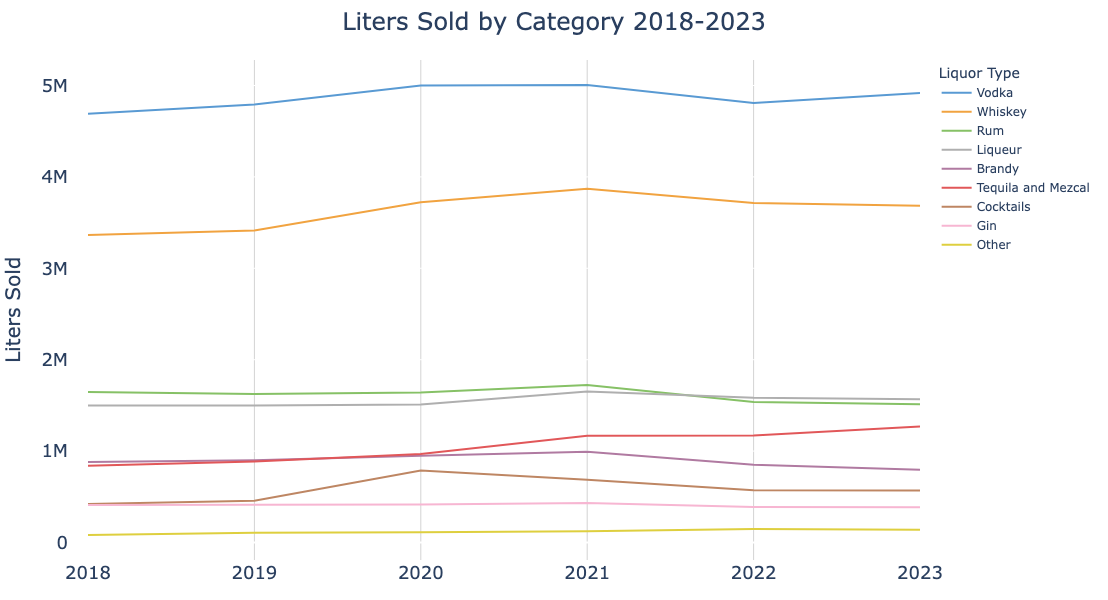

In [42]:
fig = px.line(
    cat_year_df,
    x='year',
    y='liters_sold_per_cat',
    orientation='h',  # Horizontal bar chart
    color='liquor_type',  # Assign colors based on field
    color_discrete_map = liquor_colors,
    labels={'liters_sold_per_cat': 'Liters Sold ', 'year': 'Year ', 'liquor_type': 'Liquor Type ' }, 
    height=600  
)

fig.update_layout(
    xaxis=dict(
        title=None,
        tickfont=dict(size=18),
        title_font = dict(size = 20),
        showgrid = True,
        gridcolor = 'LightGrey'
    ), 
    
    yaxis=dict(
        title= 'Liters Sold',
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        ticksuffix = '   ', #used to create pad between ytick labels and chart
        tickformat=".0s" # No decimal places, use SI notation
    ),
    
    title=dict(
        text = "Liters Sold by Category 2018-2023",
        font = dict(size = 30),
        x = .5,
        xanchor = 'center',
        font_size = 24
     ),
    
    legend = dict(
    title = 'Liquor Type'),

    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot area
    margin=dict(l=40, r=40, t=60, b=40),  # Left, Right, Top, Bottom margins
)

fig.show()

We see that regardless of county and year, vodka and whiskey dramatically outsell all other liquor categories. Let's look at vodka and whiskey sales compared to all other categories.

In [43]:
top_cats_counties_sql_statement = """
with source_table AS(
  SELECT
  volume_sold_liters,
  county,
  item_description,
  category_name
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE EXTRACT(YEAR FROM date) IN (2018, 2019, 2020, 2021, 2022, 2023) AND county IN ("POLK","LINN","SCOTT","JOHNSON","BLACK HAWK", "WOODBURY","DUBUQUE","STORY","DALLAS","POTTAWATTAMIE")
),

liquor_categories AS 
  (SELECT
  volume_sold_liters,
  county,
  CASE 
  WHEN category_name LIKE '%WHIS%' OR category_name LIKE '%BOUR%'OR category_name LIKE '%RYE%' OR item_description LIKE '%RYE%' OR item_description LIKE '%WHIS%'OR item_description LIKE '%SCOTCH%' OR category_name LIKE '%SCOTCH%' OR item_description LIKE '%BEAM%' OR item_description LIKE '%BOUR%' OR item_description LIKE '%CROWN ROYAL%' OR item_description LIKE '%JACK DAN%'OR item_description LIKE '%EVAN WILL%'OR item_description LIKE '%MAKER%MARK%' OR item_description LIKE '%SIR WINSTON%' OR item_description LIKE '%ELIJAH%' OR item_description LIKE '%JOHNNIE WALKER%'THEN 'Whiskey'
  WHEN category_name LIKE '%VOD%' OR item_description LIKE '%VOD%'OR item_description LIKE '%SMIRN%'THEN 'Vodka'
  ELSE 'All Other' END AS liquor_type
  FROM source_table)

SELECT  
  liquor_type,
  county,
  sum(volume_sold_liters) AS liters_sold_per_cat
FROM liquor_categories
GROUP BY liquor_type, county
ORDER BY liters_sold_per_cat
""" .strip()

In [44]:
top_cats_counties_df = pd.read_sql_query( top_cats_counties_sql_statement, engine)
top_cats_counties_df['county'] = top_cats_counties_df['county'].str.title()

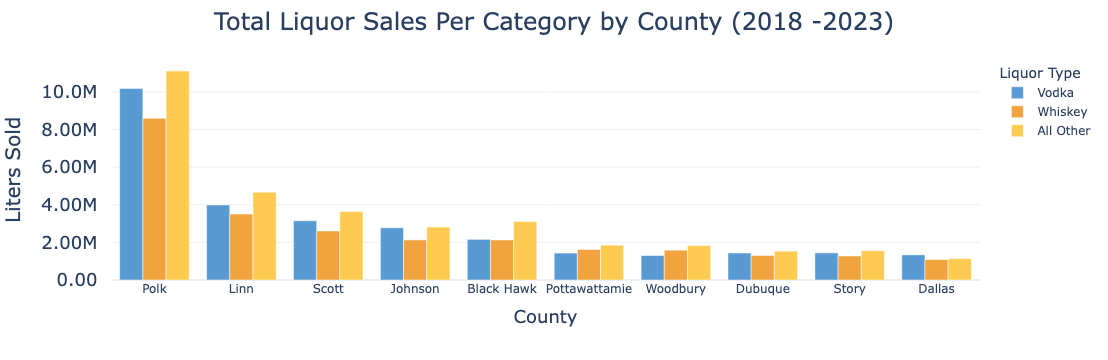

In [45]:
short_liquor_order = ['Vodka', 'Whiskey', 'All Other' ]
#county_order = ['Polk', 'Linn', 'Scott', 'Johnson', 'Black Hawk', 'Pottawattamie', 'Woodbury', 'Dubuque', 'Story', 'Dallas']
fig = px.bar(
    top_cats_counties_df, 
    x='county', 
    y='liters_sold_per_cat', 
    color='liquor_type', 
    template='plotly_white',
    category_orders = {'liquor_type': liquor_order, 'county': county_order},
    color_discrete_map = liquor_colors,
    barmode='group',  # Group bars, not stack them
    labels={'liters_sold_per_cat': 'Liters Sold Per Category ', 'county': 'County ', 'liquor_type': 'Liquor Type '},  # Renaming axis labels for clarity
)

fig.update_layout(
        xaxis = dict(
        title = 'County',
        title_font = dict(size = 18),
        tickfont=dict(size=12)
        ),
    
        yaxis = dict(
        title='Liters Sold',
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        ticksuffix = '  ',
        tickformat= ".3s" # One decimal place, use SI notation
       ) ,
    
       title=dict(
        text = 'Total Liquor Sales Per Category by County (2018 -2023)',
        x = .5,
        xanchor = 'center',
        font_size = 24
       ),
)
fig.show()

In [46]:
top_cats_2023_sql_statement = """
with source_table AS(
  SELECT
  volume_sold_liters,
  county,
  item_description,
  category_name
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE EXTRACT(YEAR FROM date) IN (2023) AND county IN ("POLK","LINN","SCOTT","JOHNSON","BLACK HAWK", "WOODBURY","DUBUQUE","STORY","DALLAS","POTTAWATTAMIE")
),

liquor_categories AS 
  (SELECT
  volume_sold_liters,
  county,
  CASE 
  WHEN category_name LIKE '%WHIS%' OR category_name LIKE '%BOUR%'OR category_name LIKE '%RYE%' OR item_description LIKE '%RYE%' OR item_description LIKE '%WHIS%'OR item_description LIKE '%SCOTCH%' OR category_name LIKE '%SCOTCH%' OR item_description LIKE '%BEAM%' OR item_description LIKE '%BOUR%' OR item_description LIKE '%CROWN ROYAL%' OR item_description LIKE '%JACK DAN%'OR item_description LIKE '%EVAN WILL%'OR item_description LIKE '%MAKER%MARK%' OR item_description LIKE '%SIR WINSTON%' OR item_description LIKE '%ELIJAH%' OR item_description LIKE '%JOHNNIE WALKER%'THEN 'Whiskey'
  WHEN category_name LIKE '%VOD%' OR item_description LIKE '%VOD%'OR item_description LIKE '%SMIRN%'THEN 'Vodka'
  ELSE 'All Other' END AS liquor_type
  FROM source_table)

SELECT  
  liquor_type,
  county,
  sum(volume_sold_liters) AS liters_sold_per_cat
FROM liquor_categories
GROUP BY liquor_type, county
ORDER BY liters_sold_per_cat
""" .strip()
top_cats_2023_df = pd.read_sql_query(top_cats_2023_sql_statement, engine)
top_cats_2023_df['county'] = top_cats_2023_df['county'].str.title()

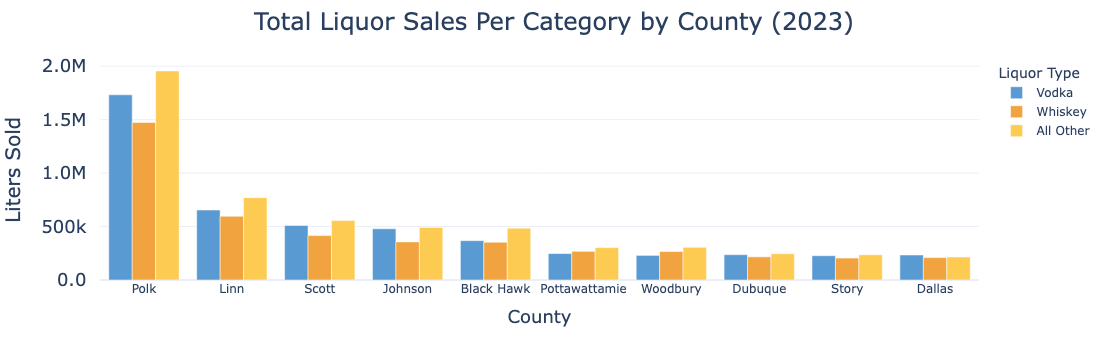

In [47]:
short_liquor_order = ['Vodka', 'Whiskey', 'All Other']
#county_order = ['Polk', 'Linn', 'Scott', 'Johnson', 'Black Hawk', 'Pottawattamie', 'Woodbury', 'Dubuque', 'Story', 'Dallas']
fig = px.bar(
    top_cats_2023_df, 
    x='county', 
    y='liters_sold_per_cat', 
    color='liquor_type', 
    template='plotly_white',
    category_orders = {'liquor_type': liquor_order, 'county': county_order},
    color_discrete_map = liquor_colors,
    barmode='group',  # Group bars, not stack them
    labels={'liters_sold_per_cat': 'Liters Sold Per Category ', 'county': 'County ', 'liquor_type': 'Liquor Type '},  # Renaming axis labels for clarity
)

fig.update_layout(
        xaxis = dict(
        title = 'County',
        title_font = dict(size = 18),
        tickfont=dict(size=12)
        ),
    
        yaxis = dict(
        title='Liters Sold',
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        ticksuffix = '  ',
        tickformat= ".2s" # One decimal place, use SI notation
       ) ,
    
       title=dict(
        text = 'Total Liquor Sales Per Category by County (2023)',
        x = .5,
        xanchor = 'center',
        font=dict(size=24)
       ),
)
fig.show()

The two previous grouped bar charts compare liquor sales per category by county. The first shows sales over the entire target period (2018-2023) and the second shows sales from 2023. While sales for the single year are, of course lower, the shapes of the charts are strikingly similar. It seems that purchasing patterns (when considering vodka, whiskey, and all other liquors) are remarkably consistent by county over time. Each county seems to have distinct preferences, and these preferences are enduring and predictable. Let's explore further by comparing purchasing patterns across all years. 

In [48]:
top_cats_all_years_sql_statement = """
with source_table AS(
  SELECT
  EXTRACT(YEAR FROM date) AS year,
  volume_sold_liters,
  county,
  item_description,
  category_name
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE EXTRACT(YEAR FROM date) IN (2018, 2019, 2020, 2021, 2022, 2023) AND county IN ("POLK","LINN","SCOTT","JOHNSON","BLACK HAWK", "WOODBURY","DUBUQUE","STORY","DALLAS","POTTAWATTAMIE")
),

liquor_categories AS 
  (SELECT
  year,
  volume_sold_liters,
  county,
  CASE 
  WHEN category_name LIKE '%WHIS%' OR category_name LIKE '%BOUR%'OR category_name LIKE '%RYE%' OR item_description LIKE '%RYE%' OR item_description LIKE '%WHIS%'OR item_description LIKE '%SCOTCH%' OR category_name LIKE '%SCOTCH%' OR item_description LIKE '%BEAM%' OR item_description LIKE '%BOUR%' OR item_description LIKE '%CROWN ROYAL%' OR item_description LIKE '%JACK DAN%'OR item_description LIKE '%EVAN WILL%'OR item_description LIKE '%MAKER%MARK%' OR item_description LIKE '%SIR WINSTON%' OR item_description LIKE '%ELIJAH%' OR item_description LIKE '%JOHNNIE WALKER%'THEN 'Whiskey'
  WHEN category_name LIKE '%VOD%' OR item_description LIKE '%VOD%'OR item_description LIKE '%SMIRN%'THEN 'Vodka'
  ELSE 'All Other' END AS liquor_type
  FROM source_table)

SELECT
  year,
  liquor_type,
  county,
  SUM(volume_sold_liters) AS liters_sold_per_cat
FROM liquor_categories
GROUP BY year,county, liquor_type
ORDER BY year, liters_sold_per_cat
""" .strip()
top_cats_all_years_df = pd.read_sql_query(top_cats_all_years_sql_statement, engine)
top_cats_all_years_df['county'] = top_cats_all_years_df['county'].str.title()

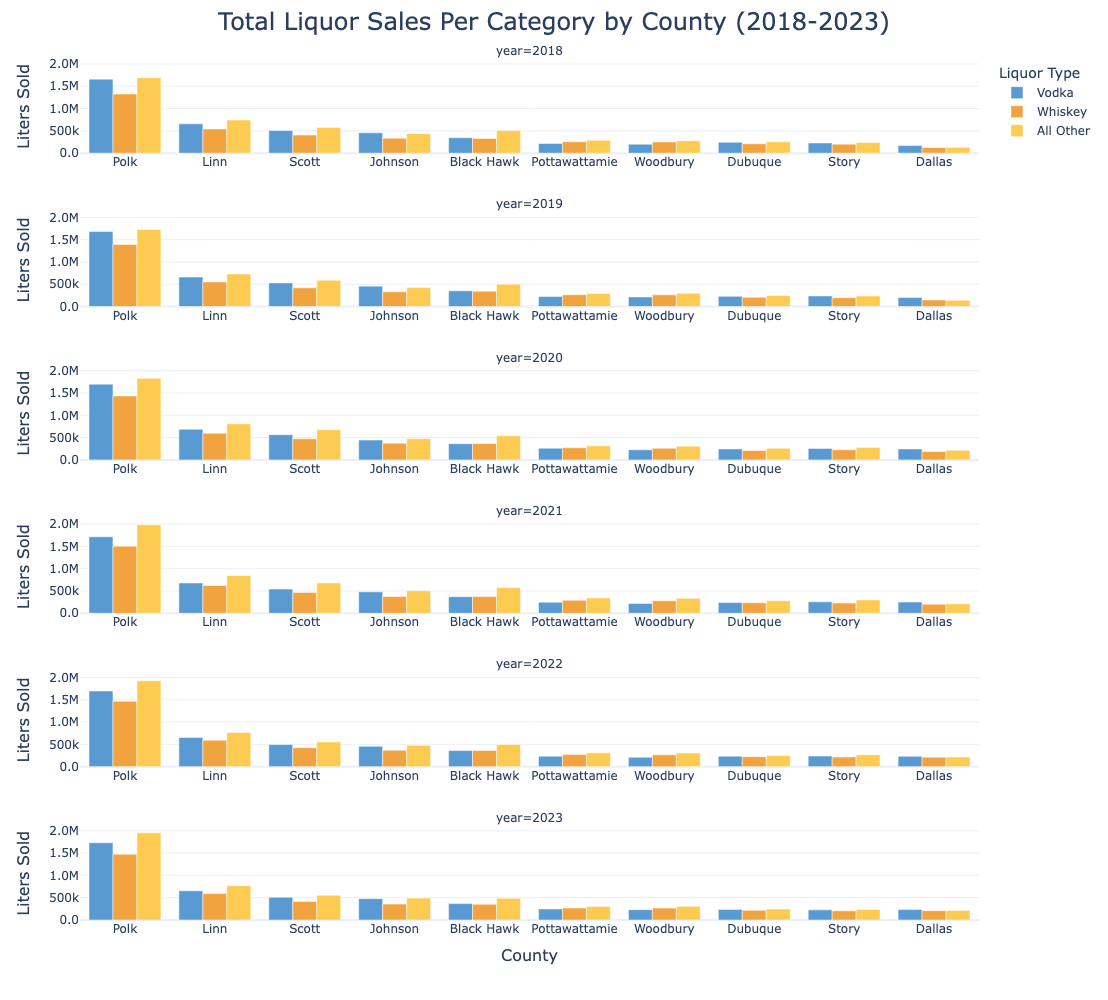

In [49]:
import plotly.express as px

fig = px.bar(
    top_cats_all_years_df, 
    x='county', 
    y='liters_sold_per_cat', 
    barmode='group',
    facet_col='year',  # Facet by year
    facet_col_wrap=1,  # Each facet in a new row
    color='liquor_type',
    color_discrete_map=liquor_colors,
    template='plotly_white',
    category_orders={'liquor_type': liquor_order, 'county': county_order},
    labels={'liters_sold_per_cat': 'Liters Sold ', 'county': 'County', 'liquor_type': 'Liquor Type'},
    height=1000,
    width=1100,
)

# Update all x-axes for facets
fig.update_xaxes(
    #title='County',
    title_font=dict(size=16),
    showticklabels=True,
    tickfont=dict(size=12)
)

# Update all y-axes for facets
fig.update_yaxes(
    title='Liters Sold',
    title_font=dict(size=16),
    tickfont=dict(size=12),
    tickformat=".2s"  # Using two decimal places with SI notation
)

fig.update_layout(
    title=dict(
        text='Total Liquor Sales Per Category by County (2018-2023)',
        x=0.5,
        xanchor='center',
        font=dict(size=24)
    ),
    # Ensure the legend is displayed and formatted correctly
    showlegend=True
)

fig.show()

 This further exploration confirms purchase patterns for vodka, whiskey, and other liquor is consistent by county over time. Each county has distinct preferences, and these preferences are enduring and predictable. 